In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

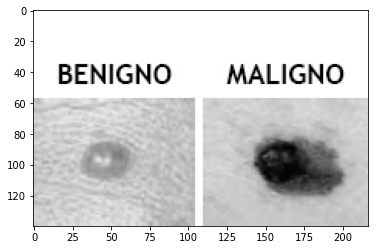

In [2]:
img = cv2.imread("./files/mela1.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("./files/mela2.jpeg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("./files/mela3.jpeg", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("./files/mela4.jpeg", cv2.IMREAD_GRAYSCALE)

imgcol = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(imgcol)

In [3]:
ben1 = img[59:,:102]
mal1 = img[59:,110:]
ben2 = img2[59:,:102]
mal2 = img2[59:,110:]
ben3 = img3[59:,:102]
mal3 = img3[59:,110:]
ben4 = img4[59:,:102]
mal4 = img4[59:,110:]

Text(0.5, 0.98, 'Benignos')

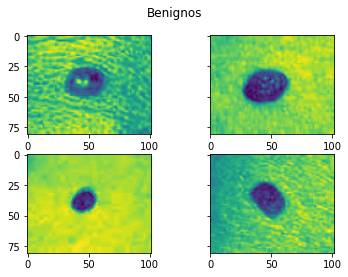

In [4]:
fig, ax = plt.subplots(2,2, sharey=True)

ax[0][0].imshow(ben1)
ax[0][1].imshow(ben2)
ax[1][0].imshow(ben3)
ax[1][1].imshow(ben4)
plt.suptitle("Benignos")

Text(0.5, 0.98, 'Malignos')

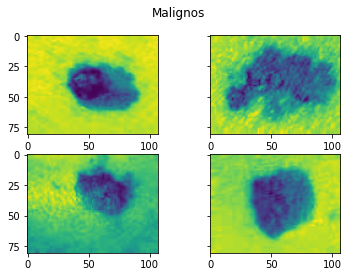

In [5]:
fig, ax = plt.subplots(2,2, sharey=True)

ax[0][0].imshow(mal1)
ax[0][1].imshow(mal2)
ax[1][0].imshow(mal3)
ax[1][1].imshow(mal4)
plt.suptitle("Malignos")

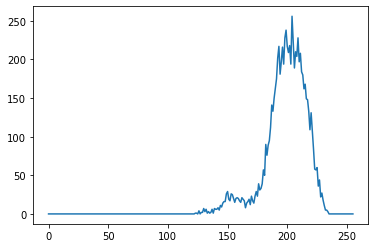

In [6]:
histr = cv2.calcHist([ben1], [0], None, [256],[0,256])
plt.plot(histr)

179.0

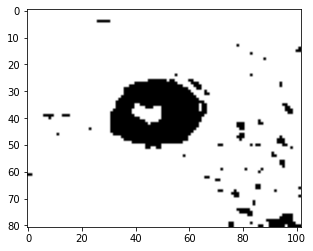

In [7]:
umbral, dst  = cv2.threshold(ben1,179, 255, cv2.THRESH_BINARY)
imgcol = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
plt.imshow(imgcol)
#plt.imshow(dst)
umbral

183.0

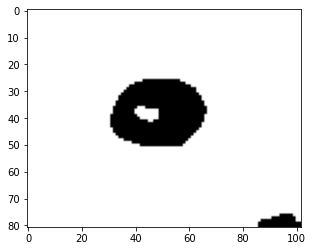

In [8]:
gauss = cv2.GaussianBlur(ben1, (11,11),0)
#umbral, dst  = cv2.threshold(gauss,166, 255, cv2.THRESH_BINARY)
umbral, dst  = cv2.threshold(gauss,0, 255, cv2.THRESH_OTSU)
imgcol = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
plt.imshow(imgcol)
#plt.imshow(dst)
umbral

In [9]:
componentes = cv2.connectedComponentsWithStats(dst, 4, cv2.CV_32S)
cant_objetos = componentes[0]
etiquetas = componentes[1]
stats = componentes[2]
componentes

(3,
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32),
 array([[  31,   26,   71,   55,  744],
        [   0,    0,  102,   81, 7480],
        [  40,   36,    9,    6,   38]], dtype=int32),
 array([[52.19892473, 41.34811828],
        [50.36296791, 39.87433155],
        [44.21052632, 38.34210526]]))

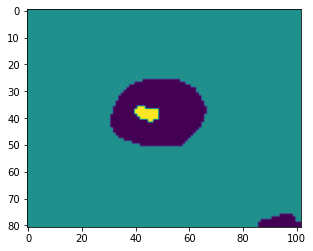

In [10]:
plt.imshow(etiquetas)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

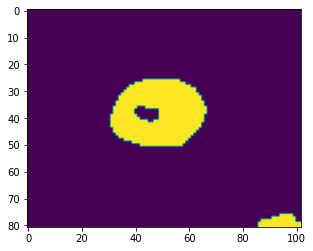

In [11]:
mascara = [np.argmax(stats[:,4][1:])==etiquetas]

plt.imshow(mascara[0])
mascara[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

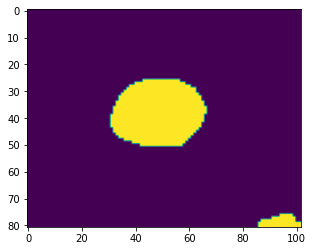

In [12]:
from scipy import ndimage as ndi
mascara_rellena = ndi.binary_fill_holes(mascara[0]).astype("uint8")
plt.imshow(mascara_rellena)
mascara_rellena

<class 'list'>
<class 'numpy.ndarray'>


((41, 1, 2), numpy.ndarray)

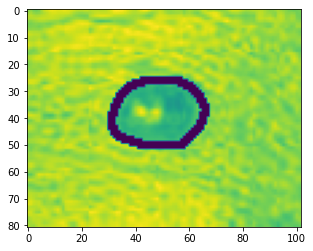

In [13]:
contours, _ = cv2.findContours(mascara_rellena, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)
print(type(contours))
#perimetro = cv2.arcLength(cnt)

#amax = 0
#cmax = None
#for cnt in contours:
#    area = cv2.contourArea(cnt)
#    if area>amax:
#        amax = area
#        cmax = cnt
#cnt = cmax

cnt = max(contours, key = cv2.contourArea)        
print(type(cnt))
imgcontornos = ben1.copy() 
imgcontornos = cv2.drawContours(imgcontornos, [cnt], -1, (0,255,0), 2)

plt.imshow(imgcontornos)
cnt.shape, type(cnt)

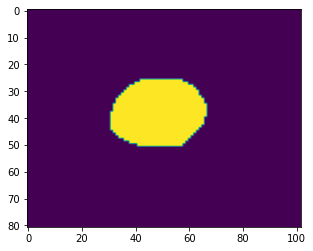

In [14]:
hull = cv2.convexHull(cnt)

puntos_convex = hull[:,0,:]
imgzeros = np.zeros(mascara_rellena.shape)
mascara_convex = cv2.fillConvexPoly(imgzeros, puntos_convex, 1)

plt.imshow(mascara_convex)

((48.5, 38.0), (24.0, 35.0), -90.0)
[[66 50]
 [31 50]
 [31 26]
 [66 26]]


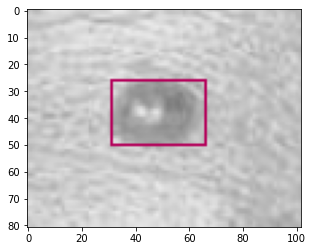

In [15]:
rect = cv2.minAreaRect(cnt)
print(rect)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
im = ben1.copy()
im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
im = cv2.drawContours(im,[box],0,(180,0,90), 1)
plt.imshow(im)

<class 'numpy.ndarray'>


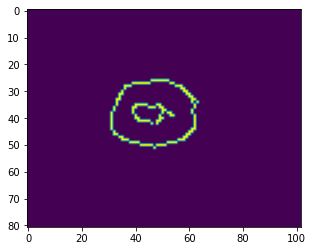

In [16]:
imcanny = cv2.Canny(gauss, 25, 110)
plt.imshow(imcanny)
print(type(imcanny))

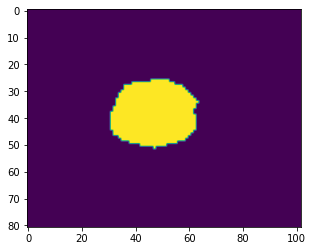

In [17]:
contours, _ = cv2.findContours(imcanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#print(type(contours))
objeto = imcanny.copy()
maxcnt = max(contours, key=cv2.contourArea)
im2 = cv2.drawContours(objeto, [maxcnt], -1, 255, thickness=-1)
plt.imshow(im2)

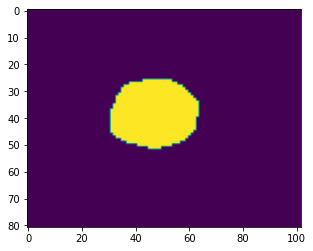

In [18]:
#cnt = max(contours, key = cv2.contourArea) 
hull = cv2.convexHull(maxcnt)

puntos_convex = hull[:,0,:]
imgzeros = np.zeros(imcanny.shape)
mascara_convex = cv2.fillConvexPoly(imgzeros, puntos_convex, 1)

plt.imshow(mascara_convex)


In [19]:
def process_image(original):
    gauss = cv2.GaussianBlur(original, (11,11),0)
    #umbral, dst  = cv2.threshold(gauss,166, 255, cv2.THRESH_BINARY)
    umbral, dst  = cv2.threshold(gauss,0, 255, cv2.THRESH_OTSU)
    return dst

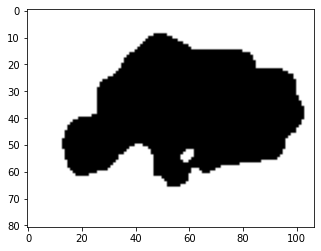

In [20]:
dst2 = process_image(mal2)
imgcol = cv2.cvtColor(dst2, cv2.COLOR_GRAY2RGB)
plt.imshow(imgcol)
    #plt.imshow(dst)



In [21]:
def process_canny(original, kernel = np.ones((3,3), np.uint8)):
    gauss = cv2.GaussianBlur(original, (11,11),0)
    imcanny = cv2.Canny(gauss, 25, 110) 
    bordes_gordos = cv2.dilate(imcanny,kernel)
    #plt.plot(bordes_gordos)
    contornos, _ = cv2.findContours(bordes_gordos, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    objeto = bordes_gordos.copy()
    maxcnt = max(contornos, key=cv2.contourArea)
    im2 = cv2.drawContours(objeto, [maxcnt], -1, 255, thickness=-1)
    hull = cv2.convexHull(maxcnt)
    puntos_convex = hull[:,0,:]
    imgzeros = np.zeros(imcanny.shape)
    mascara_convex = cv2.fillConvexPoly(imgzeros, puntos_convex, 1)   
    return im2, mascara_convex, puntos_convex


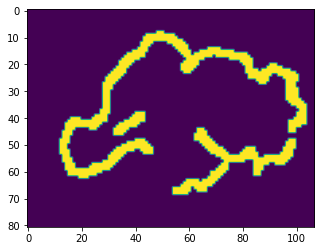

In [54]:
dst, mask, pnt = process_canny(mal2)
plt.imshow(dst)

(81, 107)

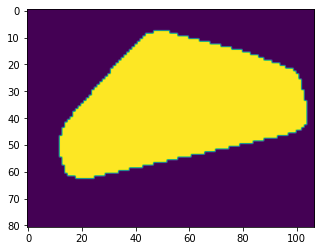

In [55]:
plt.imshow(mask)
mask.shape

(39.88340873133055, 8.96555675737016)

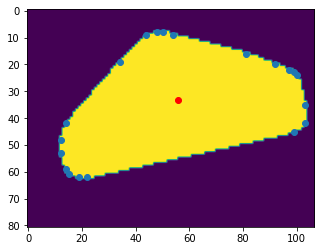

In [68]:
puntosx = pnt.flatten()[::2]
puntosy = pnt.flatten()[1::2]

plt.imshow(mask)
plt.scatter(puntosx,puntosy)

centroidex = puntosx.mean()
centroidey = puntosy.mean()

plt.scatter(centroidex, centroidey, color="red")



distances = []
#m, n = mask.shape
#ratio = m*n

for p in pnt:
    distances.append(np.linalg.norm([centroidex, centroidey] - p)) #sqrt((px2-px1)^2 + (py2-py1)^2)

distances = np.array(distances)

distances.mean(), distances.std()


In [70]:
def get_features(puntos):
    puntosx = puntos.flatten()[::2]
    puntosy = puntos.flatten()[1::2]

    centroidex = puntosx.mean()
    centroidey = puntosy.mean()

    distances = []

    for p in pnt:
        distances.append(np.linalg.norm([centroidex, centroidey] - p)) #sqrt((px2-px1)^2 + (py2-py1)^2)

    distances = np.array(distances)

    return distances.mean(), distances.std()


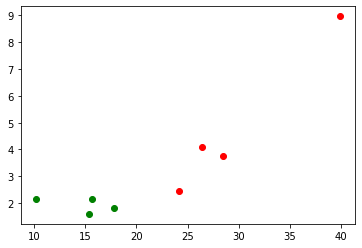

In [92]:
buenos = [ben1, ben2, ben3, ben4]
malos = [mal1, mal2, mal3, mal4]
datasetb = []
for b in buenos:
    dst, mask, pnt = process_canny(b)
    datasetb.append(list(get_features(pnt)))

datasetmal = []

for m in malos:
    dst, mask, pnt = process_canny(m)
    datasetmal.append(list(get_features(pnt)))

datasetb =  np.array(datasetb)
datasetmal = np.array(datasetmal)
    
puntosxb = datasetb.flatten()[::2]
puntosyb = datasetb.flatten()[1::2]

puntosxm = datasetmal.flatten()[::2]
puntosym = datasetmal.flatten()[1::2]

plt.scatter(puntosxb, puntosyb, color="green")
plt.scatter(puntosxm, puntosym, color="red")

#print(datasetb)
#print(datasetmal)

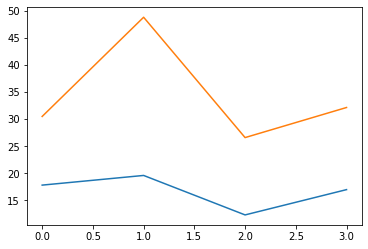

In [100]:
plt.plot(puntosxb+puntosyb)
plt.plot(puntosxm+puntosym)

(96, 1, 2) <class 'numpy.ndarray'>


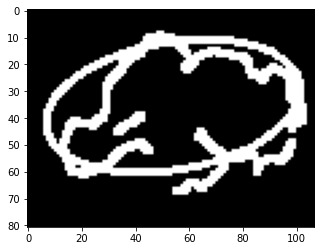

In [163]:
msk =np.uint8(mask)
contornos, _ = cv2.findContours(msk, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = np.array(contornos).astype(np.int32)
print(cnt[0].shape, type(cnt[0]))

ellipse = cv2.fitEllipse(cnt[0])

circulo = dst.copy()
circulo= cv2.ellipse(circulo,ellipse,(255,255,255),2)
circulo = cv2.cvtColor(circulo, cv2.COLOR_GRAY2RGB)
plt.imshow(circulo)


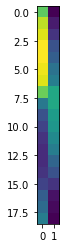

In [101]:
rect = cv2.minAreaRect(cnt)
print(rect)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
im = mal2.copy()
im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
im = cv2.drawContours(im,[box],0,(180,0,90), 1)
plt.imshow(im)

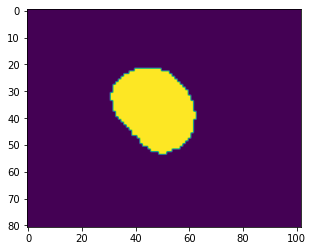

In [26]:
chafa = process_canny(ben4)
plt.imshow(chafa)
